## advertising1,2는 가정별 TV,신문,라디오를 이용하는 시간과 Sales 수치를 나타내서, 어떤 매체를 통해 광고하는 것이 효율적인 지를 분석할 수 있는 데이터입니다. 아래 문제를 한 개씩 순서대로 해결하세요. 

sales는 판매 수치

## 1. 데이터 전처리

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 

### 1 (a). advertising1.csv와 advertising2.csv를 pd.read_csv를 통해서 load하여  advertising1, advertising2의 이름으로 할당하세요. 

In [113]:
advertising1 = pd.read_csv('advertising/advertising1.csv')
advertising2 = pd.read_csv('advertising/advertising2.csv')

### 1.(b) 두 데이터의 형태를 head()를 통해서 확인하세요.

In [114]:
advertising1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [115]:
advertising2.head()

,TV,Radio,Newspaper,Sales
0,43.1,26.7,35.1,10.1
1,228.0,37.7,32.0,21.5
2,202.5,22.3,31.6,16.6
3,177.0,33.4,38.7,17.1
4,293.6,27.7,1.8,20.7


### 1.(c) 두 데이터를 advertising의 이름으로 병합하세요, 병합 시에 ignore_index 옵션을 활용하여, 0~199까지 되게 하세요.

In [116]:
advertising = pd.concat([advertising1, advertising2], ignore_index=True)
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### 1. (d) advertising의 각 피처별로 각 피처의 평균값으로 결측치를 채우세요. ex) TV 피처의 평균이 0.5라면 TV 열의 결측치는 0.5로 채우세요.

In [117]:
advertising = advertising.fillna(advertising.mean(axis='index'))
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### 1. (e) advertising이 열 별로 0~1까지의 값을 갖도록, (x-x.min())/(x.max()-x.min())의 최대-최소 스케일링을 적용하세요.

In [118]:
advertising = advertising.apply(lambda x: (x-x.min()) / (x.max()-x.min()))
advertising

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.409449
3,0.509976,0.832661,0.511873,0.586614
4,0.609063,0.217742,0.510994,0.641732
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.488189
197,0.596212,0.187500,0.053650,0.519685
198,0.956713,0.846774,0.579595,0.940945


## 2. 데이터 시각화

### 2.(a) 시본을 활용해서 아래와 같이 3개의 subplot을 갖는 figure를 그리시오.

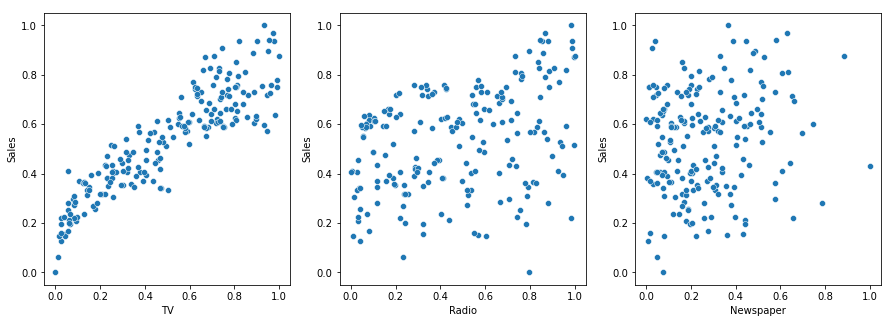

In [119]:
Image("HW2_1.png")

<Axes: xlabel='Newspaper', ylabel='Sales'>

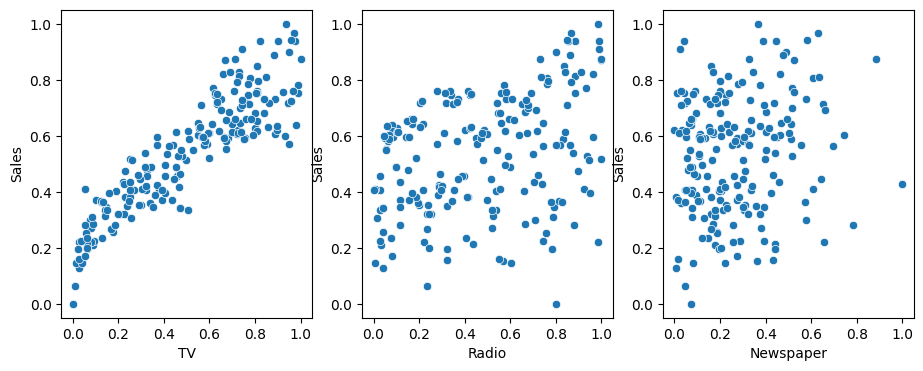

In [120]:
fig = plt.figure(figsize=(11,4))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.scatterplot(x="TV", y="Sales", data=advertising, ax=ax1)
sns.scatterplot(x="Radio", y="Sales", data=advertising, ax=ax2)
sns.scatterplot(x="Newspaper", y="Sales", data=advertising, ax=ax3)

### 2.(b) 아래와 같은 시본 pairplot을 그리시오. (대각 성분은 'kde'를 그리세요.)

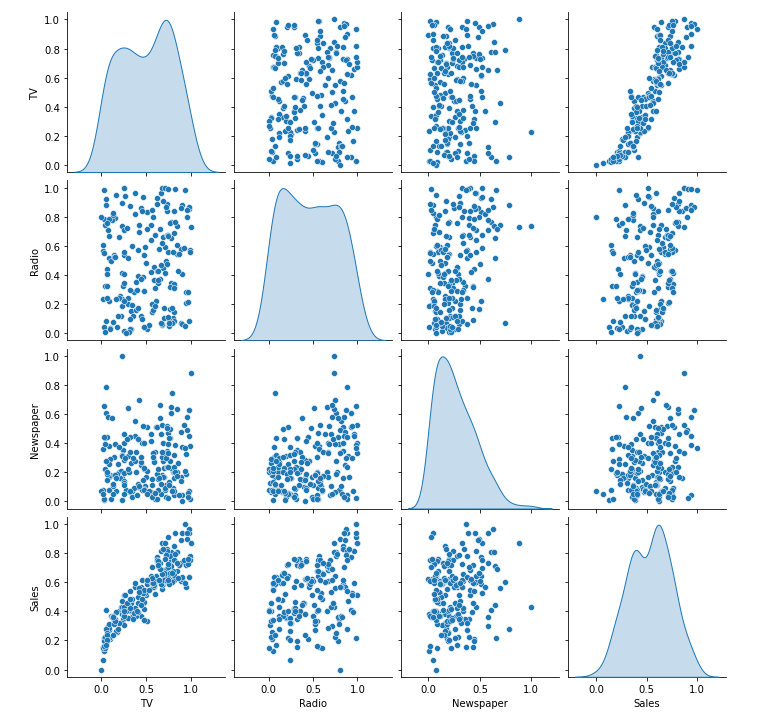

In [121]:
Image("HW2_2.png")

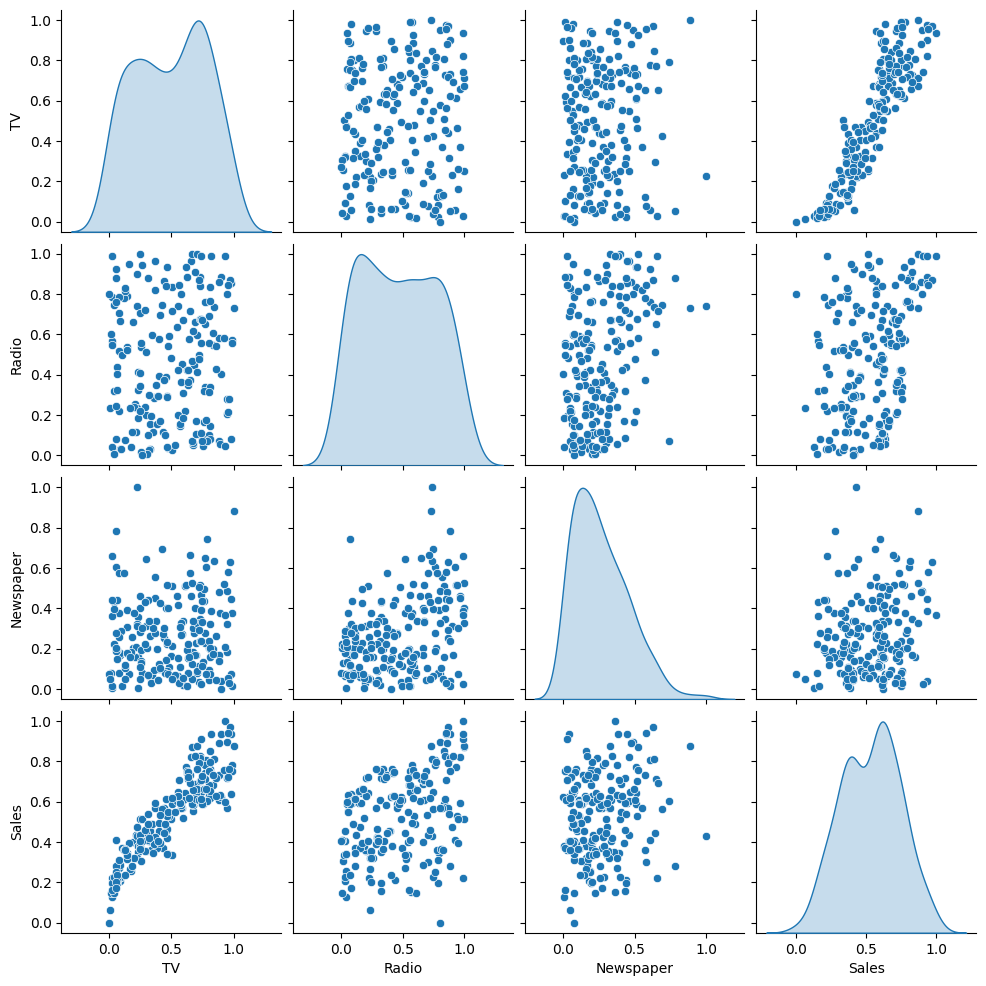

In [122]:
sns.pairplot(advertising, diag_kind='kde')

## 3. 데이터 이산화 및 그룹연산

### 3.(a) advertising의 TV, Radio, Newspaper 피쳐에 대해서 균등하게 3개로 이산화한다음 순서대로 'light', 'middle', 'heavy'로 라벨링하시오.

(cut은 min과 max사이의 range를 균등하게 쪼개는 것. qcut은 해당한 Interval에 들어가는 수가 동일하도록 하는 것 -> qcut말고 cut 사용)

In [123]:
advertising['TV'] = pd.cut(advertising['TV'], 3, labels=['light', 'middle', 'heavy'])
advertising['Radio'] = pd.cut(advertising['Radio'], 3, labels=['light', 'middle', 'heavy'])
advertising['Newspaper'] = pd.cut(advertising['Newspaper'], 3, labels=['light', 'middle', 'heavy'])
advertising

,TV,Radio,Newspaper,Sales
0,heavy,heavy,middle,0.807087
1,light,heavy,middle,0.346457
2,light,heavy,middle,0.409449
3,middle,heavy,middle,0.586614
4,middle,light,middle,0.641732
...,...,...,...,...
195,light,light,light,0.236220
196,light,light,light,0.488189
197,middle,light,light,0.519685
198,heavy,heavy,middle,0.940945


### 3.(b) 아래처럼 advertising의 TV 에 대해서 그룹화를 하고, 평균과 분산에 대해서 'Average', 'Variance'라는 이름으로 집계치를 나타내세요. 

(각 그룹별로 sales값의 average, variance 나타내기)

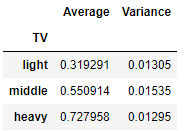

In [124]:
Image("HW2_3.png")

In [127]:
advertising.groupby('TV').agg({'Sales':[("Average","mean"),("Variance",np.var)]})

/var/folders/9y/9s104_6d69g1krb9mrzdrc6h0000gn/T/ipykernel_5629/685605060.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  advertising.groupby('TV').agg({'Sales':[("Average","mean"),("Variance",np.var)]})
/var/folders/9y/9s104_6d69g1krb9mrzdrc6h0000gn/T/ipykernel_5629/685605060.py:1: FutureWarning: The provided callable <function var at 0x104e12e80> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  advertising.groupby('TV').agg({'Sales':[("Average","mean"),("Variance",np.var)]})


Sales         
         Average Variance
TV                       
light   0.319291  0.01305
middle  0.550914  0.01535
heavy   0.727958  0.01295

### 3.(c) TV 피처에 대해 그룹화를 진행하고,  샘플별 Sales 값을 그룹별 'Sales' 값의 평균치로 변환하여 나타내세요.

(집계말고 변환)

In [131]:
advertising.groupby('TV')['Sales'].transform('mean')

/var/folders/9y/9s104_6d69g1krb9mrzdrc6h0000gn/T/ipykernel_5629/3587204864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  advertising.groupby('TV')['Sales'].transform('mean')


0      0.727958
1      0.319291
2      0.319291
3      0.550914
4      0.550914
         ...   
195    0.319291
196    0.319291
197    0.550914
198    0.727958
199    0.727958
Name: Sales, Length: 200, dtype: float64

### 3.(d) TV 피처에 대해 그룹화를 진행하고, 그룹별 Sales 값이 가장 큰 10개의 값을 나타내세요.

(순서는 오름차순, 내림차순 신경 안 쓸것임)

In [135]:
grouped = advertising.groupby('TV')['Sales']
top_sales_by_TV = grouped.apply(lambda x: x.sort_values(ascending=False).head(10))
top_sales_by_TV

/var/folders/9y/9s104_6d69g1krb9mrzdrc6h0000gn/T/ipykernel_5629/1721404934.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = advertising.groupby('TV')['Sales']


TV         
light   156    0.539370
        37     0.515748
        114    0.511811
        196    0.488189
        13     0.476378
        83     0.472441
        161    0.460630
        32     0.456693
        88     0.444882
        10     0.433071
middle  15     0.818898
        53     0.771654
        139    0.751969
        154    0.748031
        97     0.744094
        85     0.732283
        162    0.720472
        103    0.712598
        193    0.708661
        141    0.692913
heavy   175    1.000000
        183    0.968504
        198    0.940945
        147    0.937008
        98     0.937008
        36     0.937008
        128    0.909449
        17     0.897638
        61     0.889764
        101    0.874016
Name: Sales, dtype: float64

### 3.(e) index는 TV, Radio 피처, columns는 Newspaper가 되고 그룹별 Sales의 평균값을 나타내는 피봇테이블을 나타내세요. (margins 옵션은 True로 하세요.) 

In [132]:
advertising.pivot_table(index=['TV','Radio'], columns=['Newspaper'], values='Sales', aggfunc='mean', margins=True)

Newspaper         light    middle     heavy       All
TV     Radio                                         
light  light   0.300379  0.312008       NaN  0.301880
       middle  0.323116  0.270669       NaN  0.311461
       heavy   0.333661  0.364352  0.354331  0.351706
middle light   0.457283  0.517717       NaN  0.462777
       middle  0.577953  0.582677       NaN  0.579134
       heavy   0.627672  0.642607  0.562992  0.631774
heavy  light   0.637174  0.651575  0.602362  0.638123
       middle  0.686089  0.692351       NaN  0.688082
       heavy   0.823908  0.868867  0.874016  0.849291
All            0.507150  0.590151  0.549606  0.532697

### 3.(f) 시본을 활용해서 아래와 같은 3개의 subplot을 갖는 figure를 그리세요.

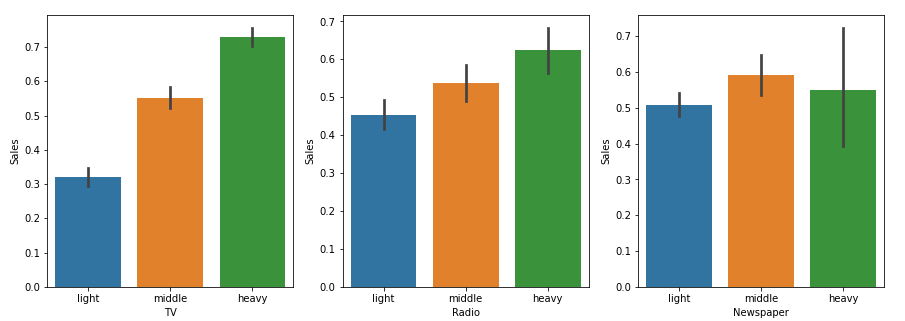

In [133]:
Image("HW2_4.png")

<Axes: xlabel='Newspaper', ylabel='Sales'>

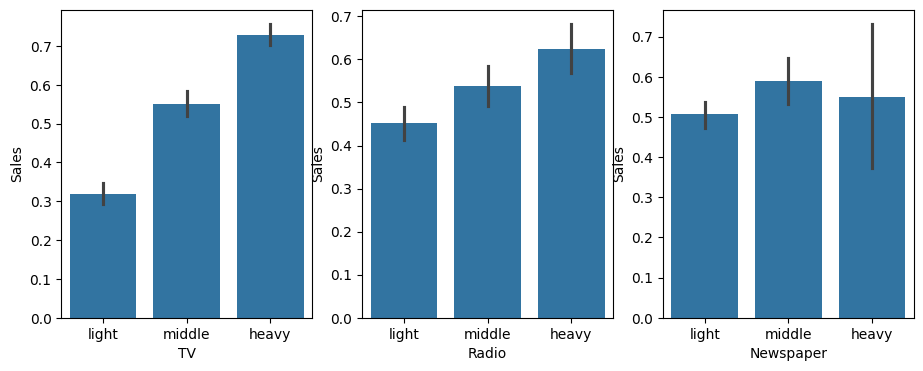

In [134]:
fig = plt.figure(figsize=(11,4))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x="TV", y="Sales", data=advertising, ax=ax1)
sns.barplot(x="Radio", y="Sales", data=advertising, ax=ax2)
sns.barplot(x="Newspaper", y="Sales", data=advertising, ax=ax3)